In [1]:
import matplotlib.pyplot as plt
import numpy as np

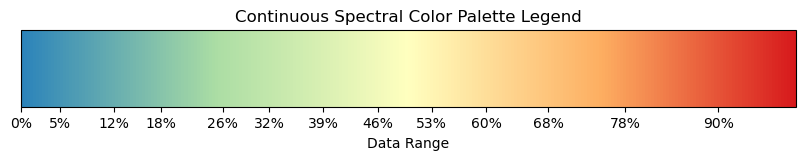

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def create_continuous_palette(hex_colors, n_colors=256):
    """
    Creates a continuous color palette from the specified hexadecimal colors.

    Parameters:
    - hex_colors: List of hexadecimal color strings.
    - n_colors: Number of colors to generate in the palette.

    Returns:
    - A continuous colormap.
    """
    # Create a color map from the hex colors
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_spectral", hex_colors, N=n_colors)
    return cmap

def plot_partitioned_legend(cmap, percentages, max_value=87):
    """
    Plots a legend with partitions based on specified percentages using the given colormap.

    Parameters:
    - cmap: The colormap to use for the legend.
    - percentages: The partition percentages.
    - max_value: The maximum value of the data range.
    """
    values = percentages * max_value / 100.0
    lengths = np.diff(values)  # Calculate lengths of each partition

    fig, ax = plt.subplots(figsize=(10, 1))
    norm = mcolors.Normalize(vmin=0, vmax=max_value)
    
    # Create a ScalarMappable and initialize a data array for the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Plot colorbar
    cb = plt.colorbar(sm, cax=ax, orientation='horizontal', ticks=[0, max_value])
    cb.set_label('Data Range')
    cb.set_ticks(values[:-1])  # Set ticks at partition boundaries
    cb.set_ticklabels([f'{p:.0f}%' for p in percentages[:-1]])
    ax.set_title("Continuous Spectral Color Palette Legend")

# Hex colors for the spectral palette
hex_colors = ["#2B83BA", "#6BB0AF", "#ABDDA4", "#D4EEB1", "#FFFFBF", 
              "#FED690", "#FDAE61", "#EA633E", "#D7191C"]

# Percentages for the partitions
percentages = np.array([0, 5, 12, 18, 26, 32, 39, 46, 53, 60, 68, 78, 90, 100])

# Create a continuous color palette
cmap = create_continuous_palette(hex_colors)

# Plot the partitioned legend
plot_partitioned_legend(cmap, percentages)


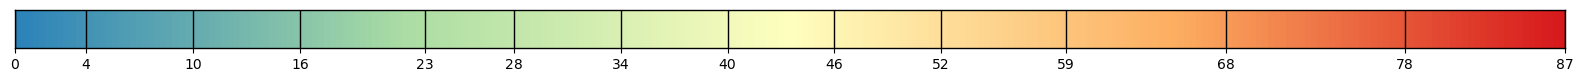

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the custom spectral colors
hex_colors = ["#2B83BA", "#6BB0AF", "#ABDDA4", "#D4EEB1", "#FFFFBF", 
              "#FED690", "#FDAE61", "#EA633E", "#D7191C"]
# Create a continuous colormap
spectral_map = LinearSegmentedColormap.from_list("custom_spectral", hex_colors)

# Data range and percentages
max_value = 87
percentages = np.array([0, 5, 12, 18, 26, 32, 39, 46, 53, 60, 68, 78, 90, 100]) #LUCAS

# max_value = 4115
# percentages = np.array([0, 10, 16, 26, 26, 32, 38, 46, 62, 100]) #RaCA
values = np.round(percentages * max_value / 100.0)

# Prepare figure for the legend
fig, ax = plt.subplots(figsize=(20, 0.5))
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Display the continuous colormap
ax.imshow(gradient, aspect='auto', cmap=spectral_map, extent=[0, max_value, 0, 1])

# Draw black lines to divide fractions of data
for value in values:
    ax.axvline(x=value, color='black', linestyle='-', linewidth=1)

# Add a black frame around the legend
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Customize the legend appearance
ax.set_yticks([])
ax.set_xticks(values)
# 
ax.set_xticklabels(values.astype(int), fontname ='sans-serif')  # Set font here


# # Setting the font for the title and labels
# plt.xlabel("Data Range (rounded values)", fontname='Times New Roman')
# plt.title("Continuous Spectral Color Palette with Data Partitions", fontname='Times New Roman')

# If you want to set Times New Roman as the default for all text in the plot:
plt.rcParams['font.family'] = 'Calibri'

# Save the plot
plt.savefig('spectral_color_legend_transparent_LUCAS.png', dpi=200, bbox_inches='tight')

plt.show()
